In [63]:
import sqlite3  # database operations
import pandas as pd  # data manipulation and analysis
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # enhanced visualizations
# Set a Seaborn theme
sns.set_theme(style='darkgrid', font_scale=1.2)

In [64]:
# Connect to SQLite database or create it if it doesn't exist
conn = sqlite3.connect('output/geo_data.db')

# Execute a query
query = 'SELECT * FROM geo_data'

# Fetch data into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

In [65]:
# Display the first few rows of the DataFrame
df.head()

,date,agency_name,violation_code,violation_description,location,fine,paid,penalty,latitude,longitude
0,2024-09-01 10:20:00,US. BUREAU OF ENGRAVING AND PRINTNG,P012,DISOBEYING OFFICIAL SIGN,BLK ES 300 RAOUL WALLENBERG PL SW,30,30,0,38.886,-77.034
1,2024-09-08 10:51:00,US. BUREAU OF ENGRAVING AND PRINTNG,P170,FAILURE TO DISPLAY CURRENT TAGS,SS 1300 BLK C ST SW,100,0,0,38.886,-77.031
2,2024-09-08 11:08:00,US. BUREAU OF ENGRAVING AND PRINTNG,P170,FAILURE TO DISPLAY CURRENT TAGS,NS 1300 BLK D ST SW,100,0,0,38.885,-77.031
3,2024-09-08 11:11:00,US. BUREAU OF ENGRAVING AND PRINTNG,P170,FAILURE TO DISPLAY CURRENT TAGS,NS 1300 BLK D ST SW,100,0,0,38.885,-77.031
4,2024-09-08 11:13:00,US. BUREAU OF ENGRAVING AND PRINTNG,P170,FAILURE TO DISPLAY CURRENT TAGS,SS 1300 BLK D ST SW,100,0,0,38.885,-77.031


In [66]:
#BARPLOT FUNCTION
def valueCountBarPlot(column_name,title,xlabel,ylabel,file_name):
    # Prepare data for plotting
    value_counts = df[df[column_name] != 0][column_name].value_counts().reset_index() #exclude 0
    value_counts.columns = [column_name, 'count']

    # Create a barplot
    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(data=value_counts, x=column_name, y='count', hue='count', palette='YlOrRd', legend=False)

    # Add counts on top of each bar
    [plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{int(bar.get_height())}', 
    ha='center', va='bottom', fontsize=12, fontweight='bold') for bar in barplot.patches]

    # Customize the plot
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    #Exclude 0 from displaying as y tick
    plt.yticks([tick for tick in plt.yticks()[0] if tick != 0])

    plt.tight_layout()

    # Save the plot as image
    plt.savefig(f'output/img/{file_name}')

    #Show the plot
    plt.show()



In [67]:
# Count of each unique value in column
df['fine'].value_counts()

fine
50      29277
100     22173
30      19945
45       8701
35       4978
25       4040
250      2206
20       2198
65        798
150       145
60         82
0          21
1000       14
500         5
10          4
5           2
Name: count, dtype: int64

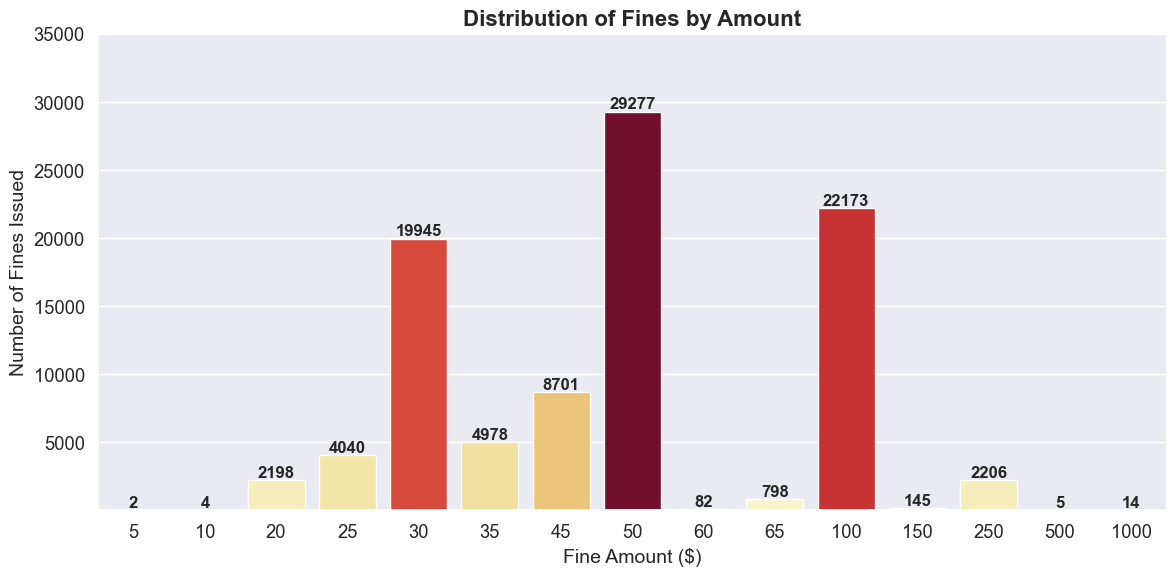

In [68]:
valueCountBarPlot('fine','Distribution of Fines by Amount','Fine Amount ($)','Number of Fines Issued','fine_distribution.png')

In [69]:
# Count of each unique value in column
df['paid'].value_counts()

paid
0      59003
50      9959
30      8350
100     6475
45      4132
35      2269
25      1854
20       984
65       455
250      390
60       273
200      193
90        91
150       56
70        43
40        25
130       15
15         6
500        5
10         3
120        3
5          3
75         1
300        1
Name: count, dtype: int64

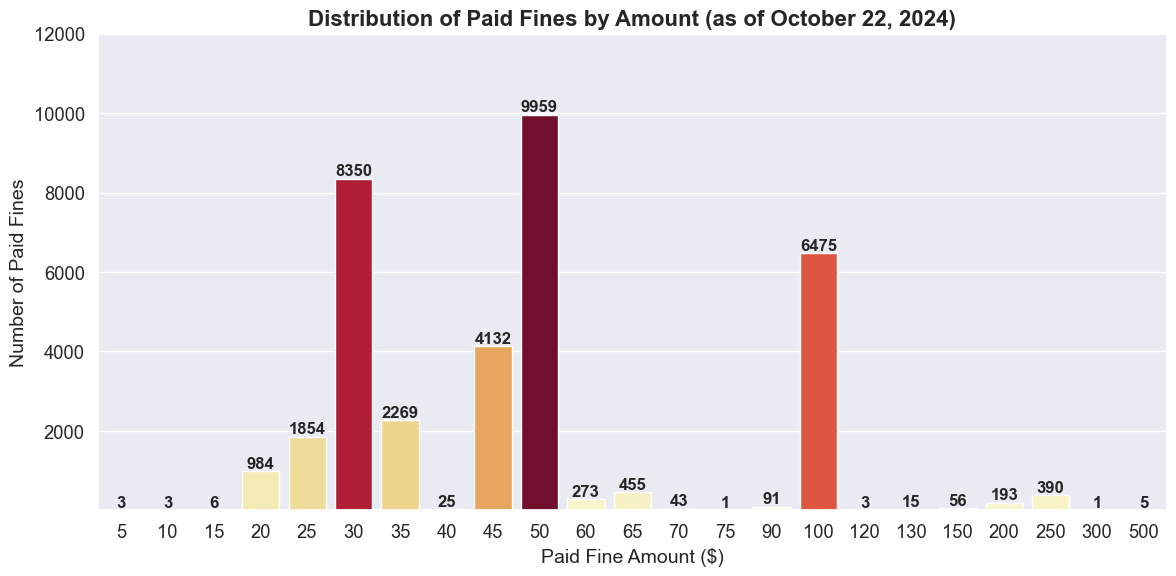

In [70]:
valueCountBarPlot('paid', 'Distribution of Paid Fines by Amount (as of October 22, 2024)', 'Paid Fine Amount ($)', 'Number of Paid Fines','paid_fines_distribution.png')

In [71]:
# Count of each unique value in column
df['penalty'].value_counts()

penalty
0       73766
50       6561
100      5653
30       4179
45       1500
35       1001
25        806
250       526
20        429
65        113
150        27
60         23
1000        3
500         1
5           1
Name: count, dtype: int64

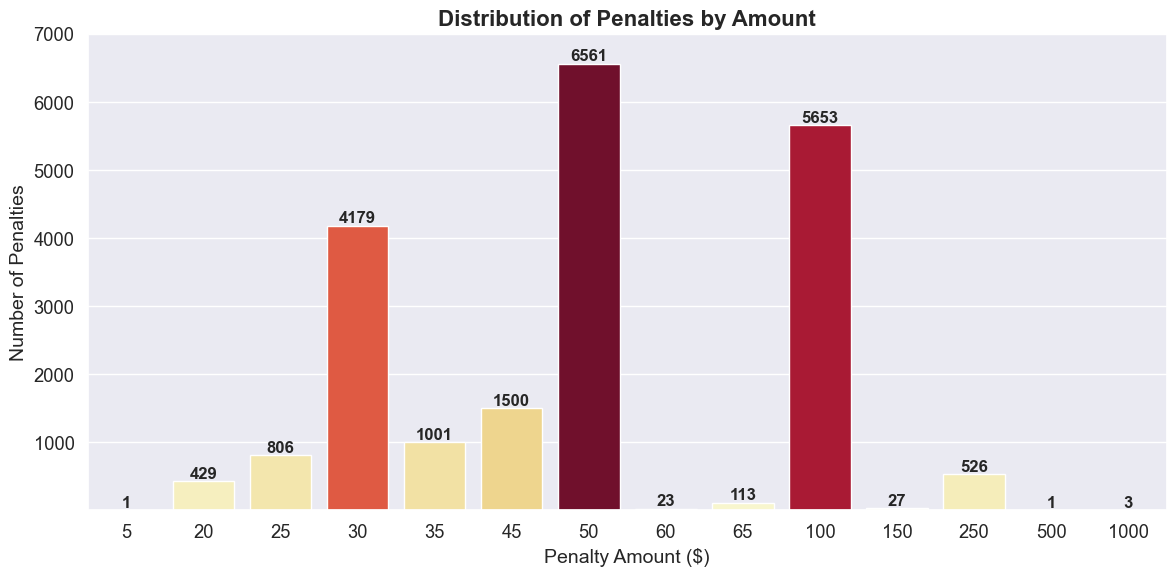

In [72]:
valueCountBarPlot('penalty', 'Distribution of Penalties by Amount', 'Penalty Amount ($)', 'Number of Penalties','penalty_distribution.png')

In [81]:
# Format with commas
paid_total = f"${df['paid'].sum():,}" # :, is an f string format specifier, adding commas to numbers
fee_penalty_total = df['fine'].sum() + df['penalty'].sum()


print(f"Total Amount of Fines Paid: {paid_total}")
fee_penalty_total

Total Amount of Fines Paid: $1,935,310


6934590